In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model

In [2]:
fig_size_1 = (15, 5)
fig_size_2 = (7, 7)

today = datetime.today().strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')

start_date = ten_years
end_date = today

In [3]:
tickers = ['^GSPC', '^IXIC', 'CL=F', 'GC=F', '^VIX', '^TNX',
           'XLK', 'XLV', 'XLY', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLE', 'VNQ',
           'SHV', 'VCSH', 'VGSH', 'VCIT', 'VGIT', 'VCLT', 'VGLT', 'BND']

In [4]:
df = pd.DataFrame()
for t in tickers:
    df_temp = data.DataReader(t, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [t] * len(df_temp)
    df_temp['Change'] = df_temp['Close'].pct_change()
    df = df.append(df_temp)
df

,Date,Close,Ticker,Change
0,2011-01-13,1283.760010,^GSPC,NaN
1,2011-01-14,1293.239990,^GSPC,0.007385
2,2011-01-18,1295.020020,^GSPC,0.001376
3,2011-01-19,1281.920044,^GSPC,-0.010116
4,2011-01-20,1280.260010,^GSPC,-0.001295
...,...,...,...,...
2512,2021-01-07,87.349998,BND,-0.002056
2513,2021-01-08,87.269997,BND,-0.000916
2514,2021-01-11,87.180000,BND,-0.001031
2515,2021-01-12,87.160004,BND,-0.000229


In [5]:
df_pivoted = pd.pivot_table(df, values='Change', index='Date', columns='Ticker')
df_pivoted['Y'] = df_pivoted[['^GSPC']].shift(-1)
df_pivoted = df_pivoted.dropna()
df_pivoted

Ticker,BND,CL=F,GC=F,SHV,VCIT,VCLT,VCSH,VGIT,VGLT,VGSH,...,XLK,XLP,XLU,XLV,XLY,^GSPC,^IXIC,^TNX,^VIX,Y
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-14,-0.001368,0.001532,-0.019107,0.000000,0.001767,0.001297,0.001030,-0.001959,-0.005017,0.001156,...,0.008867,0.000000,0.004748,0.001245,0.006102,0.007385,0.007315,0.009694,-0.056742,0.001376
2011-01-18,-0.000996,-0.001748,0.005660,0.000000,-0.001638,-0.007382,-0.001800,-0.001472,-0.003697,-0.001155,...,0.001146,0.000682,0.002520,0.003729,0.002901,0.001376,0.003829,0.009301,0.026520,-0.010116
2011-01-19,0.001246,-0.005690,0.001535,0.000091,0.002019,0.000652,0.001159,0.002785,0.003711,0.001486,...,-0.007252,-0.002044,-0.002514,-0.006811,-0.009992,-0.010116,-0.014639,-0.008026,0.090737,-0.001295
2011-01-20,-0.003734,-0.022012,-0.017297,0.000000,-0.004409,-0.005216,-0.001801,-0.006861,-0.011597,-0.001649,...,-0.005383,0.005121,0.007561,0.002494,0.002125,-0.001295,-0.007731,0.036560,0.039284,0.002414
2011-01-21,0.001999,0.002813,-0.004085,-0.000091,0.001392,0.004850,0.000902,0.003947,0.003061,0.000991,...,-0.005798,0.001698,-0.000938,0.000933,0.002385,0.002414,-0.005454,-0.012431,0.026681,0.005836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,-0.004436,0.014020,-0.023455,0.000091,-0.003304,-0.013506,-0.000961,-0.003172,-0.019771,-0.000325,...,-0.017245,0.000749,0.024873,0.013712,0.010211,0.005710,-0.006098,0.091100,-0.010655,0.014847
2021-01-07,-0.002056,0.003950,0.002832,0.000000,-0.001036,-0.000462,-0.000241,-0.001736,-0.008154,-0.000162,...,0.026954,-0.002995,-0.013093,0.013006,0.019291,0.014847,0.025641,0.027831,-0.107698,0.005492
2021-01-08,-0.000916,0.027740,-0.040893,-0.000090,-0.001556,-0.000370,-0.000361,-0.001594,-0.003245,0.000000,...,0.006465,0.004957,0.008413,0.004793,0.020619,0.005492,0.010293,0.031746,-0.036209,-0.006555


In [6]:
df_pivoted.corr(method='pearson')[['^GSPC', 'BND', 'CL=F', 'GC=F', 'SHV', '^TNX', '^VIX', 'Y']]

Ticker,^GSPC,BND,CL=F,GC=F,SHV,^TNX,^VIX,Y
Ticker,,,,,,,,
BND,-0.082432,1.000000,-0.008263,0.211226,0.132388,-0.632141,0.115846,-0.029921
CL=F,0.163674,-0.008263,1.000000,0.040626,-0.023982,0.116136,-0.119248,0.024396
GC=F,0.017799,0.211226,0.040626,1.000000,0.032117,-0.196307,0.024262,0.007808
SHV,-0.083368,0.132388,-0.023982,0.032117,1.000000,-0.095222,0.056695,0.040053
VCIT,0.062516,0.775803,0.037289,0.220798,0.106373,-0.498867,0.008211,0.057450
VCLT,0.022637,0.820796,0.020882,0.211217,0.076105,-0.554649,0.020700,0.025518
VCSH,0.151612,0.561986,0.069928,0.227223,0.129813,-0.250309,-0.049131,0.077088
VGIT,-0.419191,0.711649,-0.074183,0.219683,0.195040,-0.753687,0.345376,0.068977
VGLT,-0.464985,0.727190,-0.099501,0.189313,0.129759,-0.843494,0.344127,0.081092


In [7]:
def plot_beta(x, y):
    dff = pd.DataFrame()
    dff['x'] = x
    dff['y'] = y
    
    model = linear_model.LinearRegression()
    model.fit(np.array(dff[['x']]), np.array(dff[['y']]))
    dff['pred'] = model.predict(np.array(dff[['x']]))   

    fig, axes = plt.subplots(sharex=True)
    dff.plot(x='x', y='y', kind='scatter', ax=axes, figsize=fig_size_2, grid=True)
    dff.plot(x='x', y='pred', kind='line', color='Red', ax=axes, figsize=fig_size_2, grid=True)
    
    print('Beta:', round(model.coef_[0][0], 3))

Beta: -0.346


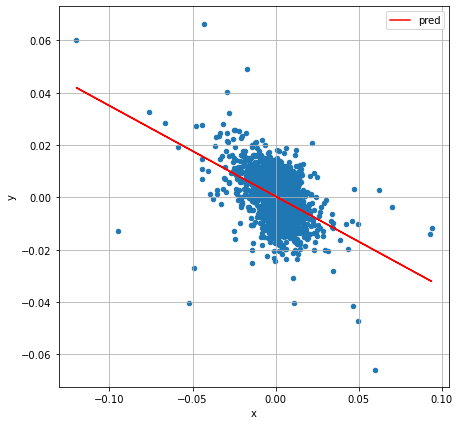

In [8]:
plot_beta(df_pivoted['^GSPC'], df_pivoted['VGLT'])

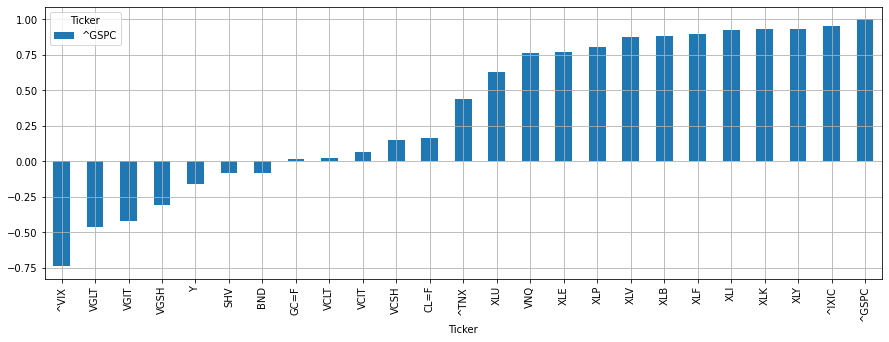

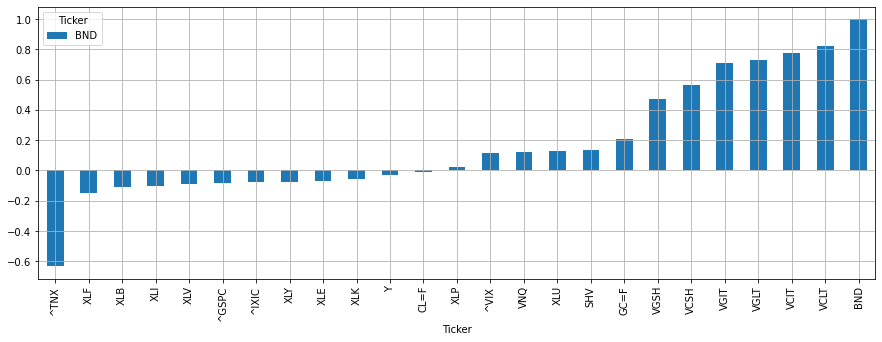

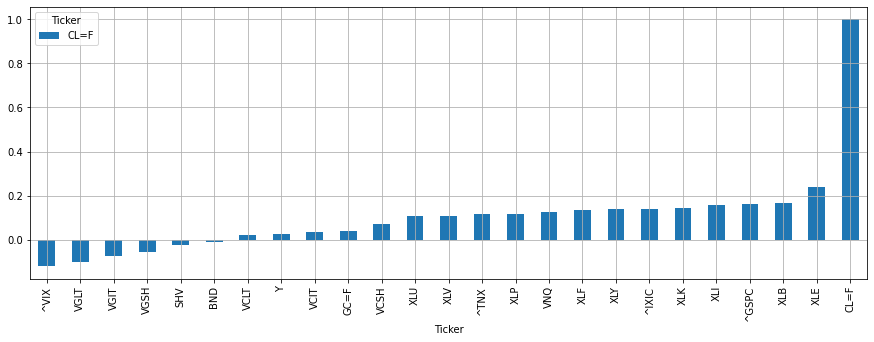

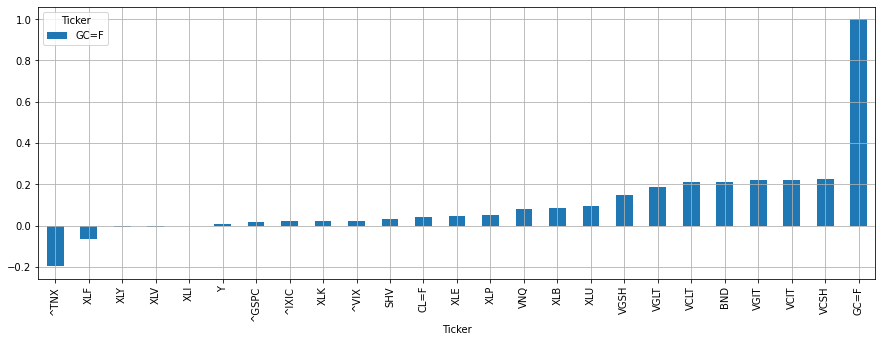

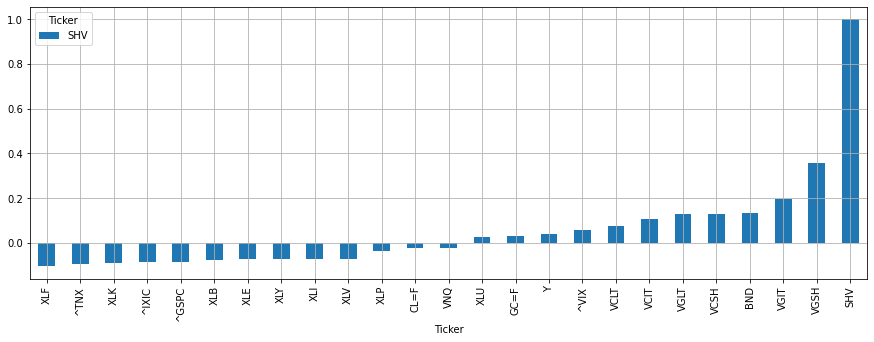

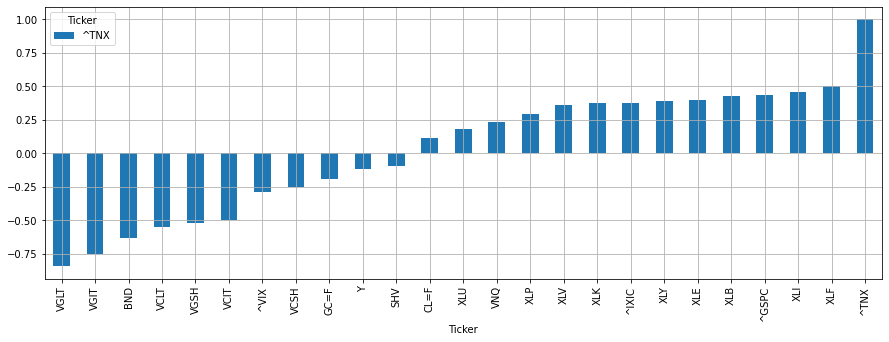

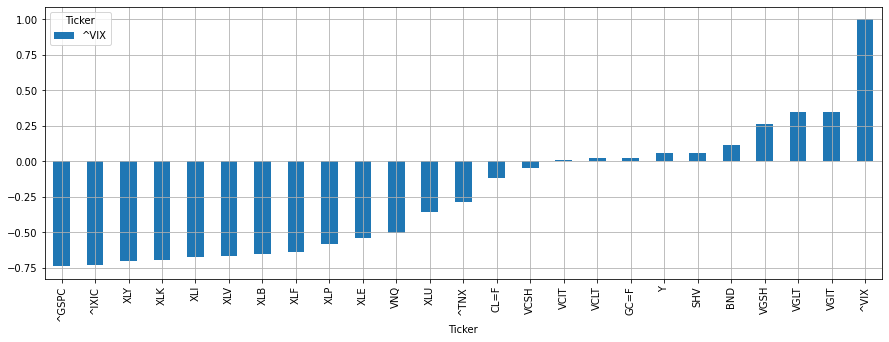

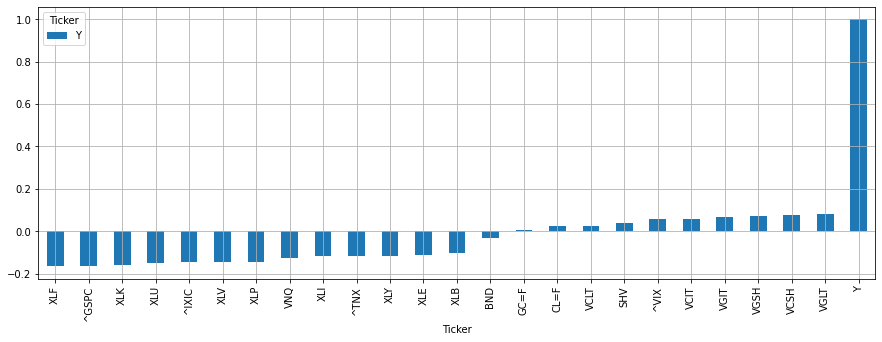

In [9]:
for t in ['^GSPC', 'BND', 'CL=F',  'GC=F', 'SHV', '^TNX', '^VIX', 'Y']:
    df_pivoted.corr()[[t]].sort_values(by=t).plot(kind='bar', figsize=fig_size_1, grid=True)